# Multinomial Naive Bayes on Amzon Fine Food Review

# Amazon Fine Food Review is about the reviews of customers on the food.

Number of columns: 10
Number of rows: 568454
Number of reviews: 568454
Number of products: 74258
Number of users: 256059

# Attribute information:
 
1) Id: Number of rows

2) ProductId: Unique ID of product 

3) UserId: User identification number

4) ProfileName: User name

5) HelpfulnessNumerator: Number of user found the review helpful

6) HelpfulnessDenominator: Number of user who found the review helpful or not

7) Score: Rating given to the product

8) Time: Timestamp at the time of review posted

9) Summary: Short version of text review

10) Text: Detailed text review

# Objective:

We need to find if the review is positive (1) or negative (0).

We are provided with the score from 1 to 5. Let's assume score 1 & 2 are negative and score 4 & 5 are positive. We are ignoring 3 as it can be considered as neutral.

# Loading dataset

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline

from time import time

# warnings library is to ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset

df = pd.read_csv('Reviews.csv')

# Displaying first 5 rows
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
print('Number of columns:' + ' ' + str(len(df.columns)))
print('Number of rows:' + ' ' + str(df['Id'].nunique()))
print('Number of reviews:' + ' ' + str(df['Id'].nunique()))
print('Number of products:' + ' ' + str(df['ProductId'].nunique()))
print('Number of users:' + ' ' + str(df['UserId'].nunique()))

Number of columns: 10
Number of rows: 568454
Number of reviews: 568454
Number of products: 74258
Number of users: 256059


# Assign Polarity

Let us assign positive (1) to the score 4 and 5

Let us assign negative (0) to the score 1 and 2

Let us ignore score having 3

In [5]:
# Let us first create a new dataset which doesn't have score 3 and it's respective rows.

print('Number of rows before removing score 3:' + ' ' + str(df['Id'].nunique()))

df_score = df[df['Score'] != 3]

print('Number of rows after removing score 3:' + ' ' + str(df_score['Id'].nunique()))

Number of rows before removing score 3: 568454
Number of rows after removing score 3: 525814


In [6]:
# Defining a function to assign polarity.

def scr(sc):
    if sc > 3:
        return 1
    return 0

In [7]:
# Calling function to assign polarity using .apply()
df_score['Score'] = df_score['Score'].apply(scr)

print("Number of positive (1) and negative (0) reviews")

df_score['Score'].value_counts()

Number of positive (1) and negative (0) reviews


1    443777
0     82037
Name: Score, dtype: int64

In [8]:
# Check the reduction percentage of data
print("Data percentage reduced to:" + ' ' + str(100*(len(df_score['Id'])/len(df['Id']))))

Data percentage reduced to: 92.4989533014105


# Exploratory Data Analysis

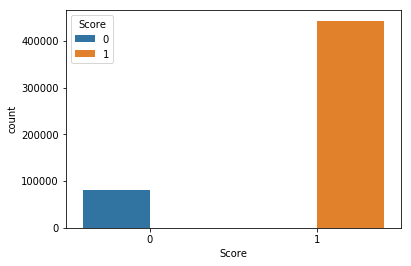

In [9]:
sns.countplot(df_score['Score'], hue = df_score['Score'])

# Observation:
As we can see, number of negative reviews are closer to 10k while positive review is more than 400k.

Ratio of negative and positive review can be assumed to be ~ 1:4.

Also, we can conclude that ~90% of the reviews are positive.

# Data Cleaning

# Null values

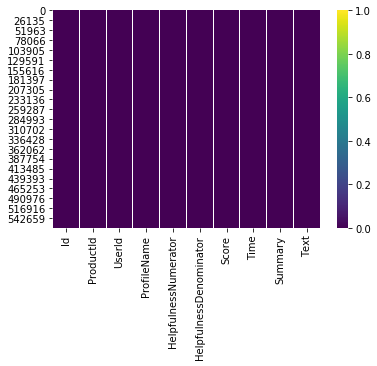

In [10]:
sns.heatmap(df_score.isnull(), cmap = 'viridis')

# Observation:
From the heat, it is clear that there are no null values

# Duplication

In [11]:
# Check if there are any duplicates or not

df_score[(df_score['UserId'].duplicated() == True) & (df_score['ProfileName'].duplicated() == True) &
         (df_score['Time'].duplicated() == True) & (df_score['Text'].duplicated() == True)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,1,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,1,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,0,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,0,1127606400,Below standard,Too much of the white pith on this orange peel...
2336,2337,B0001FQVCK,A5D06XJHDXK75,C. Po,1,1,1,1190592000,"Baci's are pure heaven - great gift, stocking ...",My family has been in love with Baci's ever si...
2647,2648,B0016FY6H6,A2NLZ3M0OJV9NX,Mark Bodzin,0,0,0,1313107200,way too weak for my tastes,"What can i say, I love iced tea. I drink a lot..."
2653,2654,B0016FY6H6,A3I4PCBRENJNG2,L. Cain,0,0,1,1300579200,quality lightly sweetened green tea powder,lots of uses for this green tea...<br /><br />...
2946,2947,B0002TJAZK,A2ISKAWUPGGOLZ,M. S. Handley,0,1,0,1310774400,Kitty Junk Food,We have five cats - one an elderly cat of 15 y...
2947,2948,B0002TJAZK,A3TVZM3ZIXG8YW,christopher hayes,0,2,0,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
3885,3886,B005GX7GVW,AS1FCKNKY95ID,"Juli A. Lee ""JingleJL""",1,1,1,1336953600,Great and good price!,I love these noodles. They are really great f...


# Observation:
    
We can see lot many duplicates in the dataset. Let's remove duplicates from the dataset.
We should first sort the dataset by ProductId so that we can keep the 1st review and remove duplicates without any mess.

In [12]:
# First let's sort the dataset by product ids.
df_sorted = df_score.sort_values('ProductId', axis = 0, ascending = True)

# Now removing duplicates from the sorted dataset.
df_dup = df_sorted.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)

print("Data percentage reduced to after removing duplicates:" + ' ' + str(100*(len(df_dup['Id'])/len(df['Id']))))

Data percentage reduced to after removing duplicates: 64.06375889693801


# Compare HelpfulnessNumerator and HelpfulnessDenominator

HelpfulnessNumerator should always be less than or equal to HelpfulnessDenominator

In [13]:
df_dup[df_dup['HelpfulnessNumerator'] > df_dup['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,1,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,1,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


# Observation:
    
We can see 2 data where HelpfulnessNumerator is greater than HelpfulnessDenominator. We need to remove such data.

In [14]:
df_final = df_dup[df_dup['HelpfulnessNumerator'] <= df_dup['HelpfulnessDenominator']]

# Check if there is any data where HelpfulnessNumerator is greater than HelpfulnessDenominator
df_final[df_final['HelpfulnessNumerator'] > df_final['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


We can see now that the dataset has HelpfulnessNumerator less than or equal HelpfulnessDenominator.

In [15]:
print("Data percentage reduced to:" + ' ' + str(100*(len(df_final['Id'])/len(df['Id']))))

Data percentage reduced to: 64.06340706547935


# Text Preprocessing:

1) Remove HTML tag

2) Remove punctuations and numbers

3) Remove URLs

4) Renaming short forms like can't to can not, 's to is, 're to are, etc

5) Stop-word removal

6) Stemming

7) Change it to lowercase and join it.

In [16]:
# Importing libraries

import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
from tqdm import tqdm

# Create an instance for SnowballStemmer
ss = SnowballStemmer('english')

# Defining functions for HTML, URL, Punctuation, Stopwords removal and getting stem words

In [17]:
# To remove HTML tags
def html(ht):
    ht = BeautifulSoup(ht, 'lxml').get_text()
    return ht


# To remove URL
def url(ur):
    ur = re.sub(r"http\S+", '', ur)
    return ur

# To convert from shortform to fullform
def short_word(full_word):
    
    full_word = full_word.lower()              # Python reads Won't and won't as separate words. So change to lowercase
    
    full_word = re.sub(r"won't", "will not", full_word)
    full_word = re.sub(r"wouldn't", "would not", full_word)
    full_word = re.sub(r"can't", "can not", full_word)
    full_word = re.sub(r"don't", "don not", full_word)
    full_word = re.sub(r"shouldn't", "should not", full_word)
    full_word = re.sub(r"couldn't", "could not", full_word)
    full_word = re.sub(r"\'re", " are", full_word)
    full_word = re.sub(r"\'s", " is", full_word)
    full_word = re.sub(r"\'d", " would", full_word)
    full_word = re.sub(r"\'ll", " will", full_word)
    full_word = re.sub(r"\'ve", " have", full_word)
    full_word = re.sub(r"\'m", " am", full_word)
    return full_word

# To remove punctuations, numbers, stopwords and get stem of words
def punc(pun):
    
    pun = re.sub('[^a-zA-Z]', ' ', pun)
    pun = pun.lower()
    pun = pun.split()
    
    if len(pun) > 2:
        pun = [ss.stem(sw) for sw in pun if sw not in stopwords.words('english')]
        pun = ' '.join(pun)
        return pun 


# Apply text processing functions to 'Text' data
HTML tag removal, url, punctuation, stop word removal, rename

In [19]:
%%time

filtered = []                                    # All the filtered data is stored in this list
positive = []                                    # All the positive review data is stored in this list
negative = []                                    # All the negative review data is stored in this list

for i, s in enumerate (tqdm(df_final['Text'].values)):
     
    h = html(s)                                         # Removes HTML tag
    u = url(h)                                          # Removes URL
    f = short_word(u)                                   # Converts from short form to full form
    p = punc(f)                                         # Removes punctuation, numbers, does stemming for the words > 2
    
    if df_final['Score'].values[i] == 1:
        positive.append(p)                               # Positive review list
    if df_final['Score'].values[i] == 0:
        negative.append(p)                               # Negative review list
        
    filtered.append(p)                                   # Complete filtered list

100%|████████████████████████████████| 364171/364171 [8:57:33<00:00, 11.29it/s]


Wall time: 8h 57min 33s


# Apply text processing functions to 'Summary' data
HTML tag removal, url, punctuation, stop word removal, rename

In [145]:
%%time

filtered_smr = []                                    # All the filtered data is stored in this list
positive_smr = []                                    # All the positive review data is stored in this list
negative_smr = []                                    # All the negative review data is stored in this list

for i, s in enumerate (df_final['Summary'].values):
    
    st = str(s)
    h = html(st)                                         # Removes HTML tag
    u = url(h)                                          # Removes URL
    f = short_word(u)                                   # Converts from short form to full form
    p = punc(f)                                         # Removes punctuation, numbers, does stemming for the words > 2
    
    if df_final['Score'].values[i] == 1:
        positive_smr.append(pun)                               # Positive review list
    if df_final['Score'].values[i] == 0:
        negative_smr.append(pun)                               # Negative review list
        
    filtered_smr.append(pun)                                   # Complete filtered list 

Wall time: 25min 22s


In [50]:
# Adding a new column  which contains clean text from Text column
df_final['Clean_Text'] = filtered

# Adding filtered summary data.
df_final['Clean_Summary'] = filtered_smr

df_final.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Clean_Text,Clean_Summary
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...,pay expedit deliveri
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...,pay expedit deliveri


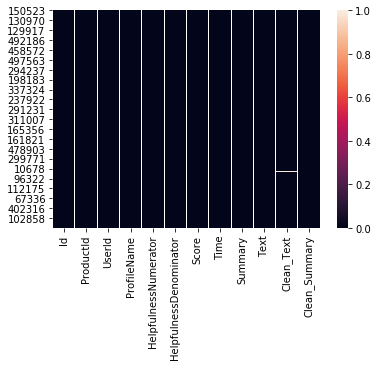

In [36]:
# After cleaning text data, let's check if there is any null values

sns.heatmap(df_final.isnull

# Observation:

Clean_Summary have no null values.

But under clean text, there is a null value. We shall check how it is null.

In [40]:
df_final[df_final['Clean_Text'].isnull()==True]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Clean_Text,Clean_Summary
345314,345315,B00023T3IA,A3NID9D9WMIV01,"Louie Arrighi ""Lou da Joo""",2,2,1,1290211200,Popcorn and Kewpie,"<span class=""tiny""> Length:: 0:26 Mins<br /><b...",None,pay expedit deliveri
143403,143404,B0007A0AQM,AZOCULM8WEV27,Sweetone,8,11,1,1300406400,Best Treats for my Yorkie/Maltese,"<span class=""tiny""> Length:: 0:42 Mins<br /><b...",None,pay expedit deliveri
459486,459487,B000SANU7C,A3LO09M9VISVBV,Myron Slover,1,1,0,1341100800,What happened!,"<span class=""tiny""> Length:: 1:30 Mins<br /><b...",None,pay expedit deliveri
409877,409878,B000TV8STA,A3TFSOU5B2CIUT,justntym,7,8,1,1243382400,Smoke and Spice and everything nice,"<span class=""tiny""> Length:: 0:39 Mins<br /><b...",None,pay expedit deliveri
234305,234306,B001EJN8IC,A3NID9D9WMIV01,"Louie Arrighi ""Lou da Joo""",2,2,1,1289433600,best tasting protein yet,"<span class=""tiny""> Length:: 0:35 Mins<br /><b...",None,pay expedit deliveri
202220,202221,B001M2YXPI,A4ZFB125AR0GK,Teas Etc,9,9,1,1247529600,Pu'erh Tuo Cha From Teas Etc,"<span class=""tiny""> Length:: 4:34 Mins<br /><b...",None,pay expedit deliveri
233938,233939,B003E6COMO,A2ZE58VIDDCMR7,inna,1,2,1,1350000000,&#1091;&#1076;&#1086;&#1073;&#1085;&#1072;&#11...,&#1056;&#1077;&#1096;&#1080;&#1083;&#1072; &#1...,None,pay expedit deliveri
201631,201632,B007R900WA,A2OU17T4K6S644,Thomas W Hill,1,3,1,1349654400,coffee storage drawer,"<span class=""tiny""> Length:: 0:43 Mins<br /><b...",None,pay expedit deliveri
49025,49026,B007S0FZY6,A2FP1XVV2QTOCO,gumguy6667,1,1,0,1337126400,Fruity fresh? More like Fruity LAME,"<span class=""tiny""> Length:: 1:02 Mins<br /><b...",None,pay expedit deliveri
495800,495801,B0098WV8F2,A24RZIZ09CUO7Z,Donald THomas,0,0,1,1351036800,Tasted Great and DELIVERED FAST.,"<span class=""tiny""> Length:: 0:17 Mins<br /><b...",None,pay expedit deliveri


# Observation:
    
We can see around 10 null values under clean text. We can deal with null values either by imputation or removing it. Depends on the count of null values.

Since just 10 are null values, and will not effect if we remove them. We will remove null values under clean text and respective columns.

Imputation can also be applied but filling null values with correspoinding review is a time taking. Since, removing will not affect, we will remove it.

In [46]:
df_final_f = df_final.dropna()

In [48]:
df_final_f[df_final_f['Clean_Text'].isnull()==True]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Clean_Text,Clean_Summary


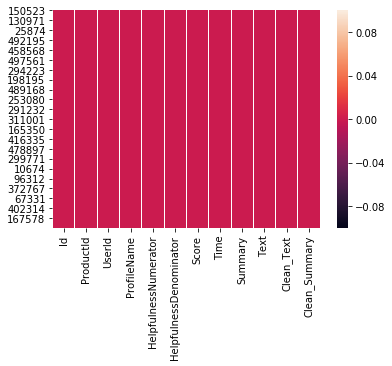

In [49]:
# After removing null values, check if there is any null value(s)

sns.heatmap(df_final_f.isnull())

# Observation:
    
Now we can see no null values. Good to go.

# Time based splitting
We need to sort the data based on time in an increasing order.

Reason: We need to predict the new input data based on the built KNN model. Built model should be trained based on increasing time order which is more helpfull in building a better model to predict new input data.

In [51]:
df_final_f = df_final_f.sort_values('Time', ascending = True)

In [53]:
# Saving the file which is sorted based on time

# df_final_f.to_csv('Amazon_Final_f_time.csv', index_label = False)

# 30k data point

Considering 30k data points as it is throwing laptop is crashing for huge data points

In [165]:
# Sample of 30k points
df_30k = df_100k.sample(n = 30000)

# Sort based on time
df_30k = df_30k.sort_values('Time', ascending = True)

# Info of df_30k
df_30k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 374419 to 550495
Data columns (total 12 columns):
Id                        30000 non-null int64
ProductId                 30000 non-null object
UserId                    30000 non-null object
ProfileName               30000 non-null object
HelpfulnessNumerator      30000 non-null int64
HelpfulnessDenominator    30000 non-null int64
Score                     30000 non-null int64
Time                      30000 non-null int64
Summary                   30000 non-null object
Text                      30000 non-null object
Clean_Text                30000 non-null object
Clean_Summary             30000 non-null object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB


In [73]:
x_30k = df_30k['Clean_Text']
print("Shape of x_30k is:" + ' ' + str(x_30k.shape))

y_30k = df_30k['Score']
print("Shape of y_30k is:" + ' ' + str(y_30k.shape),'\n')

Shape of x_30k is: (30000,)
Shape of y_30k is: (30000,) 



# Algorithm: Brute Force Bag of words, TF-IDF, Avg Word2Vec, TF-IDF Word2Vec

# Train, Test, Split

Split the x and y into train and test data.

In [74]:
# Import train test and split library

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_30k, y_30k, random_state = 0, test_size = 0.2, shuffle = False)

# Bag of words

In [75]:
# Import CountVectorizer library

from sklearn.feature_extraction.text import CountVectorizer

# Create an object to CountVectorizer
# Taking bi-gram
cv = CountVectorizer(ngram_range = (1,2))

# Fit and transform train
x_train_f = cv.fit_transform(x_train)

# Transform test
x_test_f = cv.transform(x_test)

# Normalization

Normalization is applied to bring all the values into single scale

In [76]:
# Import Normalize library
from sklearn.preprocessing import normalize

x_train_b_n = normalize(x_train_f)
x_test_b_n = normalize(x_test_f)

print("Shape of normalized BOW train data:" + ' ' + str(x_train_b_n.shape), '\n')
print("Shape of normalized BOW test data:" + ' ' + str(x_test_b_n.shape))

Shape of normalized BOW train data: (24000, 461512) 

Shape of normalized BOW test data: (6000, 461512)


# Split into train and cv

train and cv data is used to find the best hyperparameter 'k' and build the model

In [77]:
x_tr_b, x_cv_b, y_tr_b, y_cv_b = train_test_split(x_train_b_n, y_train, random_state = 0, test_size = 0.2, shuffle = False)

# Find optimal hyperparameter 'k'

Train: train and cv

Test: train and cv

In [78]:
# Import KNN and AUC score library

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_auc_score

In [80]:
# Creating a 'for loop' to find the optimal k value

auc_b_cv = []
auc_b_tr = []

k = range(1,50,2)

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i, algorithm = 'brute')
    knn_b = knn.fit(x_tr_b, y_tr_b)
    
    # cv
    pred_b_cv = knn_b.predict_proba(x_cv_b)[:,1]
    auc_scr_b_cv = roc_auc_score(y_cv_b, pred_b_cv)
    auc_b_cv.append(auc_scr_b_cv)
    
    # train
    pred_b_tr = knn_b.predict_proba(x_tr_b)[:,1]
    auc_scr_b_tr = roc_auc_score(y_tr_b, pred_b_tr)
    auc_b_tr.append(auc_scr_b_tr)
    
# Optimal k
score_b_cv = [x for x in auc_b_cv]
opt_b_cv = k[score_b_cv.index(max(score_b_cv))]
print("Maximum AUC score of cv is:" + ' ' + str(max(score_b_cv)))
print("Corresponding k value of cv is:",opt_b_cv, '\n')

print('*'*50)

score_b_tr = [x for x in auc_b_tr]
opt_b_tr = k[score_b_tr.index(max(score_b_tr))]
print("Maximum AUC score of train is:" + ' ' + str(max(score_b_tr)) )
print("Corresponding k value of train is:", opt_b_tr, '\n')

Maximum AUC score of cv is: 0.81732659114196
Corresponding k value of cv is: 49 

**************************************************
Maximum AUC score of train is: 1.0
Corresponding k value of train is: 1 



# Observation:

For cv, Maximum AUC score we got is ~81% and k value is 49. For train, Maximum AUC score we got is 100% and k value is 1

Taking 1 which resulted in 100% score may lead to overfit. We can probably consider 49 as k.

Let's check graphically and then confirm the k value

# Plot k v/s AUC score of train and cv

Text(0.5, 1.0, 'K values v/s AUC')

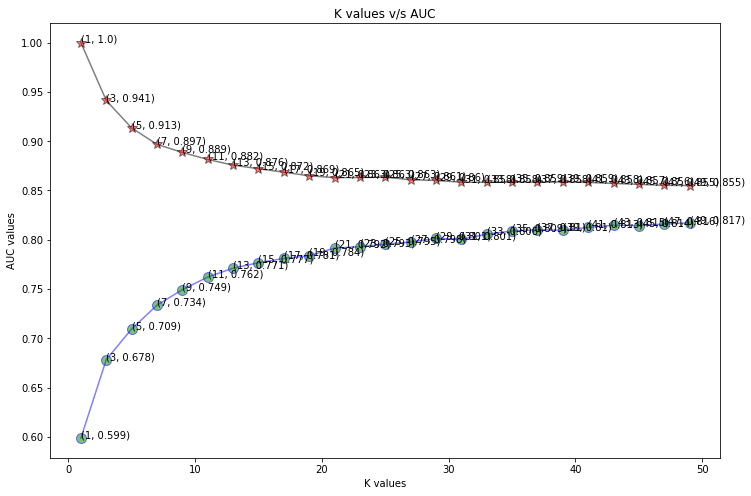

In [81]:
plt.figure(figsize = (12,8))
plt.plot(k, score_b_cv, marker = 'o', color = 'blue', markerfacecolor = 'g', markersize = '10', alpha = 0.5)

for xy in zip(k, np.round(auc_b_cv,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.plot(k, score_b_tr, marker = '*', color = 'black', markerfacecolor = 'r', markersize = '10', alpha = 0.5)

for xy in zip(k, np.round(auc_b_tr,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
plt.xlabel("K values")
plt.ylabel("AUC values")
plt.title("K values v/s AUC")

# Observation:
    
Graphically, we can see that train curve decreasing gradually while cv cure is increasing gradually. The gap between traiv cure and cv curve, as we can see, is less at the k value of 49 with ~81% score.

We will consider k value as 49 and will predict the test data.

# Model performance on train and cv with ROC curve

Text(0.5, 0, 'False Positive Rate')

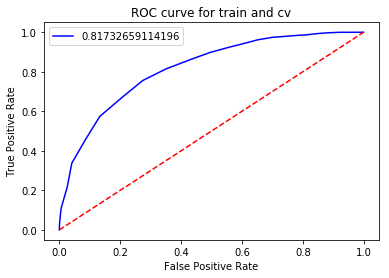

In [84]:
# Referred the concept from https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
# Referred the code part from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

# calculating the FPR and TPR for all thresholds of the classification

from sklearn import metrics

knn_p_b= KNeighborsClassifier(n_neighbors = opt_b_cv, algorithm = 'brute')
knn_p_b = knn_p_b.fit(x_tr_b, y_tr_b)

prob_p_b = knn_p_b.predict_proba(x_cv_b)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_cv_b, prob_p_b)
roc_auc_curve_p_b = metrics.auc(fpr, tpr)


plt.title('ROC curve for train and cv')
plt.plot(fpr, tpr, 'b', label = roc_auc_curve_p_b)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Observation:
    
We got 0.817 which 81% AUC score. Probability of model in separating positive and negative reply is 81%

# Applying KNN on test data with alpha 49.

In [85]:
kn_test_b = KNeighborsClassifier(n_neighbors = opt_b_cv, algorithm = 'brute')
kn_test_b = kn_test_b.fit(x_train_b_n, y_train)
pred_test_b = kn_test_b.predict(x_test_b_n)

# predict_proba_ for roc_auc_score
pred_pro_test_b = kn_test_b.predict_proba(x_test_b_n)[:,1]

# Metrics

ROC AUC score is  0.81 

**************************************************
f1 score is  0.914 

**************************************************
Precision score is  0.843 

**************************************************
ROC AUC Score is  0.999 

**************************************************
Classification report 

              precision    recall  f1-score   support

           0       0.90      0.04      0.09       978
           1       0.84      1.00      0.91      5022

   micro avg       0.84      0.84      0.84      6000
   macro avg       0.87      0.52      0.50      6000
weighted avg       0.85      0.84      0.78      6000

**************************************************
Confusion matrix table: 



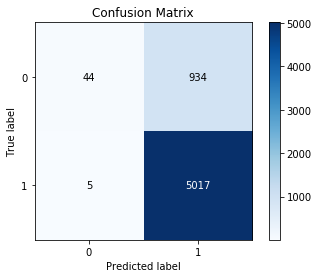

In [86]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, classification_report

rab = np.round(roc_auc_score(y_test, pred_pro_test_b),3)
print("ROC AUC score is ", rab, '\n')
print('*'*50)

fb = np.round(f1_score(y_test, pred_test_b),3)
print("f1 score is ", fb, '\n')
print('*'*50)

pb = np.round(precision_score(y_test, pred_test_b),3)
print("Precision score is ", pb, '\n')
print('*'*50)

reb = np.round(recall_score(y_test, pred_test_b),3)
print("ROC AUC Score is ", reb, '\n')
print('*'*50)

print("Classification report", '\n')
print(classification_report(y_test, pred_test_b))
print('*'*50)

# Referred from: https://scikit-plot.readthedocs.io/en/stable/Quickstart.html
print("Confusion matrix table:", '\n')
skplt.metrics.plot_confusion_matrix(y_test, pred_test_b)

# ROC curve on train and test data

Text(0.5, 0, 'False Positive Rate')

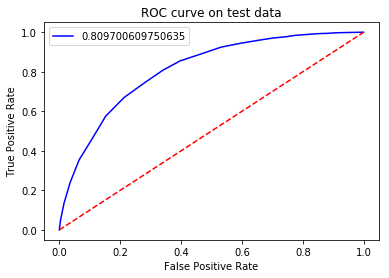

In [87]:
# Referred the concept from https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
# Referred the code part from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

# calculating the FPR and TPR for all thresholds of the classification

prob_test_b = kn_test_b.predict_proba(x_test_b_n)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_test_b)
roc_auc_curve_test_b = metrics.auc(fpr, tpr)


plt.title('ROC curve on test data')
plt.plot(fpr, tpr, 'b', label = roc_auc_curve_test_b)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Observation:
    
Threshold value: 0.5
    
AUC we got is 0.80 which means the probability of separation of positive and negative review will be ~80% good.

Curve represents the ROC while the area under the curve represents the AUC (Area Under Curve)

# Tf-Idf

In [88]:
# Import Tf-Idf
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance
tf = TfidfVectorizer(ngram_range = (1,2))

# Fit and transform the x_train
x_train_tf = tf.fit_transform(x_train)

# Transform the x_test
x_test_tf = tf.transform(x_test)

# Normalization

In [89]:
# Normalize train and test data
x_train_tn = normalize(x_train_tf)
x_test_tn = normalize(x_test_tf)

print("Shape of normalized TFIDF train data:" + ' ' + str(x_train_tn.shape), '\n')
print("Shape of normalized TFIDF test data:" + ' ' + str(x_test_tn.shape))

Shape of normalized TFIDF train data: (24000, 461512) 

Shape of normalized TFIDF test data: (6000, 461512)


# Split into train and cv

In [90]:
x_tr_t, x_cv_t, y_tr_t, y_cv_t = train_test_split(x_train_tn, y_train, random_state = 0, test_size = 0.2, shuffle = False)

# Find optimal hyperparameter 'k'

Train: train and cv

Test: train and cv

In [91]:
# Creating a 'for loop' to find the optimal k value

auc_t_cv = []
auc_t_tr = []

k = range(1,50,2)

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i, algorithm = 'brute')
    knn_t = knn.fit(x_tr_t, y_tr_t)
    
    # cv
    pred_t_cv = knn_t.predict_proba(x_cv_t)[:,1]
    auc_scr_t_cv = roc_auc_score(y_cv_t, pred_t_cv)
    auc_t_cv.append(auc_scr_t_cv)
    
    # train
    pred_t_tr = knn_t.predict_proba(x_tr_t)[:,1]
    auc_scr_t_tr = roc_auc_score(y_tr_t, pred_t_tr)
    auc_t_tr.append(auc_scr_t_tr)
    
# Optimal k
score_t_cv = [x for x in auc_t_cv]
opt_t_cv = k[score_t_cv.index(max(score_t_cv))]
print("Maximum AUC score of cv is:" + ' ' + str(max(score_t_cv)))
print("Corresponding k value of cv is:",opt_t_cv, '\n')

print('*'*50)

score_t_tr = [x for x in auc_t_tr]
opt_t_tr = k[score_t_tr.index(max(score_t_tr))]
print("Maximum AUC score of train is:" + ' ' + str(max(score_t_tr)) )
print("Corresponding k value of train is:", opt_t_tr, '\n')

Maximum AUC score of cv is: 0.8299155824933169
Corresponding k value of cv is: 49 

**************************************************
Maximum AUC score of train is: 1.0
Corresponding k value of train is: 1 



# Observation:

For cv, Maximum AUC score we got is ~82% and k value is 49. For train, Maximum AUC score we got is 100% and k value is 1

Taking 1 which resulted in 100% score may lead to overfit. We can probably consider 49 as k.

Let's check graphically and then confirm the k value

# Plot k v/s AUC score of train and cv

Text(0.5, 1.0, 'K values v/s AUC')

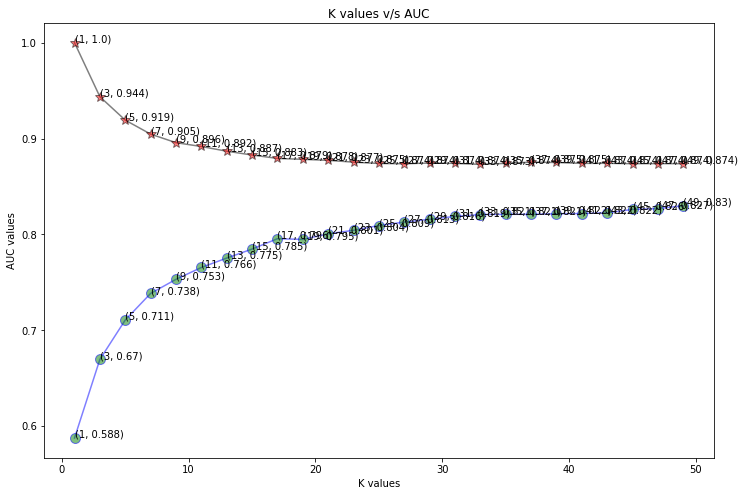

In [92]:
plt.figure(figsize = (12,8))
plt.plot(k, score_t_cv, marker = 'o', color = 'blue', markerfacecolor = 'g', markersize = '10', alpha = 0.5)

for xy in zip(k, np.round(auc_t_cv,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.plot(k, score_t_tr, marker = '*', color = 'black', markerfacecolor = 'r', markersize = '10', alpha = 0.5)

for xy in zip(k, np.round(auc_t_tr,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
plt.xlabel("K values")
plt.ylabel("AUC values")
plt.title("K values v/s AUC")

# Observation:
    
Graphically, we can see that train curve decreasing gradually while cv cure is increasing gradually. The gap between traiv cure and cv curve, as we can see, is less at the k value of 49 with ~82% score.

We will consider k value as 49 and will predict the test data.

# Model performance on train and cv with ROC curve

Text(0.5, 0, 'False Positive Rate')

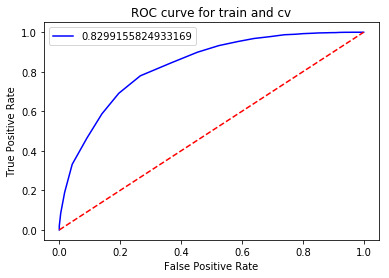

In [93]:
knn_p_t= KNeighborsClassifier(n_neighbors = opt_t_cv, algorithm = 'brute')
knn_p_t = knn_p_t.fit(x_tr_t, y_tr_t)

prob_p_t = knn_p_t.predict_proba(x_cv_t)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_cv_t, prob_p_t)
roc_auc_curve_p_t = metrics.auc(fpr, tpr)


plt.title('ROC curve for train and cv')
plt.plot(fpr, tpr, 'b', label = roc_auc_curve_p_t)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Observation:
    
We got 0.829 which 82% AUC score. Probability of model in separating positive and negative reply is 82%

# Applying KNN on test data with alpha 49.

In [94]:
kn_test_t = KNeighborsClassifier(n_neighbors = opt_t_cv)
kn_test_t = kn_test_t.fit(x_train_tn, y_train)
pred_test_t = kn_test_t.predict(x_test_tn)

# predict_proba_ for roc_auc_score
pred_pro_test_t = kn_test_t.predict_proba(x_test_tn)[:,1]

# Metrics

ROC AUC score is  0.824 

**************************************************
f1 score is  0.914 

**************************************************
Precision score is  0.843 

**************************************************
ROC AUC Score is  0.999 

**************************************************
Classification report 

              precision    recall  f1-score   support

           0       0.91      0.05      0.10       978
           1       0.84      1.00      0.92      5022

   micro avg       0.84      0.84      0.84      6000
   macro avg       0.88      0.53      0.51      6000
weighted avg       0.86      0.84      0.78      6000

**************************************************
Confusion matrix table: 



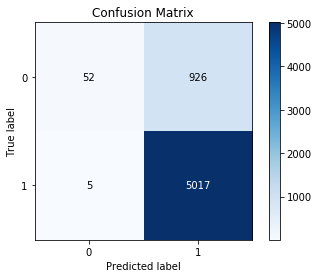

In [95]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, classification_report

rat = np.round(roc_auc_score(y_test, pred_pro_test_t),3)
print("ROC AUC score is ", rat, '\n')
print('*'*50)

ft = np.round(f1_score(y_test, pred_test_t),3)
print("f1 score is ", fb, '\n')
print('*'*50)

pt = np.round(precision_score(y_test, pred_test_t),3)
print("Precision score is ", pb, '\n')
print('*'*50)

ret = np.round(recall_score(y_test, pred_test_t),3)
print("ROC AUC Score is ", reb, '\n')
print('*'*50)

print("Classification report", '\n')
print(classification_report(y_test, pred_test_t))
print('*'*50)

# Referred from: https://scikit-plot.readthedocs.io/en/stable/Quickstart.html
print("Confusion matrix table:", '\n')
skplt.metrics.plot_confusion_matrix(y_test, pred_test_t)

# ROC curve on train and test data

Text(0.5, 0, 'False Positive Rate')

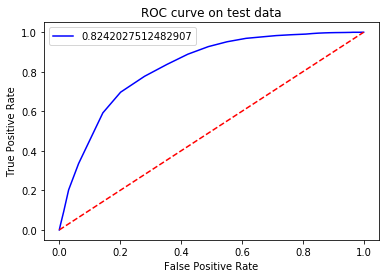

In [96]:
prob_test_t = kn_test_t.predict_proba(x_test_tn)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_test_t)
roc_auc_curve_test_t = metrics.auc(fpr, tpr)


plt.title('ROC curve on test data')
plt.plot(fpr, tpr, 'b', label = roc_auc_curve_test_t)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Observation:
    
Threshold value: 0.5
    
AUC we got is 0.824 which means the probability of separation of positive and negative review will be ~82% good.

Curve represents the ROC while the area under the curve represents the AUC (Area Under Curve)

# Algorithm: KD-Tree on BOW, TF-IDF, Avg Word2Vec. TF-IDF Word2Vec

# Bag of Words

In [121]:
# Import CountVectorizer library

from sklearn.feature_extraction.text import CountVectorizer

# Create an object to CountVectorizer
# Taking bi-gram
cv_k = CountVectorizer(ngram_range = (1,2), min_df = 10, max_features = 500)

# Fit and transform train
x_train_k_f = cv_k.fit_transform(x_train)

# Transform test
x_test_k_f = cv_k.transform(x_test)

# Normalization

In [122]:
x_train_k_b_n = normalize(x_train_k_f)
x_test_k_b_n = normalize(x_test_k_f)

print("Shape of normalized BOW train data:" + ' ' + str(x_train_k_b_n.shape), '\n')
print("Shape of normalized BOW test data:" + ' ' + str(x_test_k_b_n.shape))

Shape of normalized BOW train data: (24000, 500) 

Shape of normalized BOW test data: (6000, 500)


# Convert to dense matrix

In [123]:
# Converting to dense matrix
x_train_k_b_d = x_train_k_b_n.todense()
x_test_k_b_d = x_test_k_b_n.todense()

print("Type of x_train_k_b_d:" + ' ' +  str(type(x_train_k_b_d)))
print("Type of x_test_k_b_d:"  + ' ' + str(type(x_test_k_b_d)))

Type of x_train_k_b_d: <class 'numpy.matrixlib.defmatrix.matrix'>
Type of x_test_k_b_d: <class 'numpy.matrixlib.defmatrix.matrix'>


# Split into train and cv

train and cv data is used to find the best hyperparameter 'k' and build the model

In [124]:
x_tr_k_b, x_cv_k_b, y_tr_k_b, y_cv_k_b = train_test_split(x_train_k_b_d, y_train, random_state = 0,
                                                          test_size = 0.2, shuffle = False)

# Find optimal hyperparameter 'k'

Train: train and cv

Test: train and cv

In [140]:
# Creating a 'for loop' to find the optimal k value

auc_k_b_cv = []
auc_k_b_tr = []

ki = range(1,50,3)

for i in ki:
    knn = KNeighborsClassifier(n_neighbors = i, algorithm = 'kd_tree')
    knn_k_b = knn.fit(x_tr_k_b, y_tr_k_b)
    
    # cv
    pred_k_b_cv = knn_k_b.predict_proba(x_cv_k_b)[:,1]
    auc_scr_k_b_cv = roc_auc_score(y_cv_k_b, pred_k_b_cv)
    auc_k_b_cv.append(auc_scr_k_b_cv)
    
    # train
    pred_k_b_tr = knn_k_b.predict_proba(x_tr_k_b)[:,1]
    auc_scr_k_b_tr = roc_auc_score(y_tr_k_b, pred_k_b_tr)
    auc_k_b_tr.append(auc_scr_k_b_tr)
    
# Optimal k
score_k_b_cv = [x for x in auc_k_b_cv]
opt_k_b_cv = ki[score_k_b_cv.index(max(score_k_b_cv))]
print("Maximum AUC score of cv is:" + ' ' + str(max(score_k_b_cv)))
print("Corresponding k value of cv is:",opt_k_b_cv, '\n')

print('*'*50)

score_k_b_tr = [x for x in auc_k_b_tr]
opt_k_b_tr = ki[score_k_b_tr.index(max(score_k_b_tr))]
print("Maximum AUC score of train is:" + ' ' + str(max(score_k_b_tr)) )
print("Corresponding k value of train is:", opt_k_b_tr, '\n')

Maximum AUC score of cv is: 0.7988062839274636
Corresponding k value of cv is: 49 

**************************************************
Maximum AUC score of train is: 1.0
Corresponding k value of train is: 1 



# Observation:

For cv, Maximum AUC score we got is ~79% and k value is 49. For train, Maximum AUC score we got is 100% and k value is 1

Taking 1 which resulted in 100% score may lead to overfit. We can probably consider 49 as k.

Let's check graphically and then confirm the k value

# Plot k v/s AUC score of train and cv

Text(0.5, 1.0, 'K values v/s AUC')

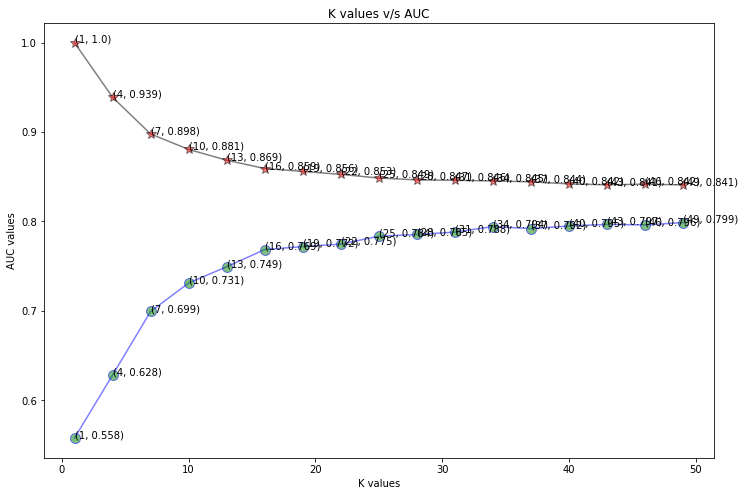

In [147]:
plt.figure(figsize = (12,8))
plt.plot(ki, score_k_b_cv, marker = 'o', color = 'blue', markerfacecolor = 'g', markersize = '10', alpha = 0.5)

for xy in zip(ki, np.round(auc_k_b_cv,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.plot(ki, score_k_b_tr, marker = '*', color = 'black', markerfacecolor = 'r', markersize = '10', alpha = 0.5)

for xy in zip(ki, np.round(auc_k_b_tr,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
plt.xlabel("K values")
plt.ylabel("AUC values")
plt.title("K values v/s AUC")

# Observation:
    
Graphically, we can see that train curve decreasing gradually while cv cure is increasing gradually. The gap between traiv cure and cv curve, as we can see, is less at the k value of 49 with ~79% score.

We will consider k value as 49 and will predict the test data.

# Model performance on train and cv with ROC curve

Text(0.5, 0, 'False Positive Rate')

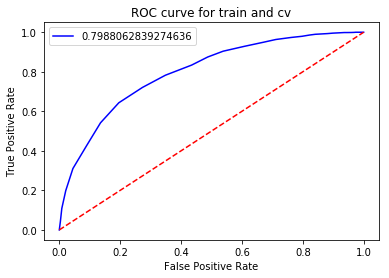

In [148]:
knn_p_k_b= KNeighborsClassifier(n_neighbors = opt_k_b_cv, algorithm = 'kd_tree')
knn_p_k_b = knn_p_k_b.fit(x_tr_k_b, y_tr_k_b)

prob_p_k_b = knn_p_k_b.predict_proba(x_cv_k_b)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_cv_k_b, prob_p_k_b)
roc_auc_curve_p_k_b = metrics.auc(fpr, tpr)


plt.title('ROC curve for train and cv')
plt.plot(fpr, tpr, 'b', label = roc_auc_curve_p_k_b)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Observation:
    
We got 0.7988 which 79% AUC score. Probability of model in separating positive and negative reply is 79%

# Applying KNN on test data with alpha 49.

In [149]:
kn_test_k_b = KNeighborsClassifier(n_neighbors = opt_k_b_cv, algorithm = 'kd_tree')
kn_test_k_b = kn_test_k_b.fit(x_train_k_b_d, y_train)
pred_test_k_b = kn_test_k_b.predict(x_test_k_b_d)

# predict_proba_ for roc_auc_score
pred_pro_test_k_b = kn_test_k_b.predict_proba(x_test_k_b_d)[:,1]

# Metrics

ROC AUC score is  0.802 

**************************************************
f1 score is  0.914 

**************************************************
Precision score is  0.843 

**************************************************
ROC AUC Score is  0.998 

**************************************************
Classification report 

              precision    recall  f1-score   support

           0       0.84      0.05      0.09       978
           1       0.84      1.00      0.91      5022

   micro avg       0.84      0.84      0.84      6000
   macro avg       0.84      0.52      0.50      6000
weighted avg       0.84      0.84      0.78      6000

**************************************************
Confusion matrix table: 



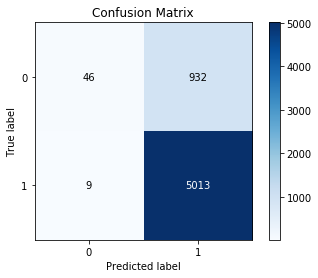

In [150]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, classification_report

rab_k = np.round(roc_auc_score(y_test, pred_pro_test_k_b),3)
print("ROC AUC score is ", rab_k, '\n')
print('*'*50)

fb_k = np.round(f1_score(y_test, pred_test_k_b),3)
print("f1 score is ", fb_k, '\n')
print('*'*50)

pb_k = np.round(precision_score(y_test, pred_test_k_b),3)
print("Precision score is ", pb_k, '\n')
print('*'*50)

reb_k = np.round(recall_score(y_test, pred_test_k_b),3)
print("ROC AUC Score is ", reb_k, '\n')
print('*'*50)

print("Classification report", '\n')
print(classification_report(y_test, pred_test_k_b))
print('*'*50)

# Referred from: https://scikit-plot.readthedocs.io/en/stable/Quickstart.html
print("Confusion matrix table:", '\n')
skplt.metrics.plot_confusion_matrix(y_test, pred_test_k_b)

# ROC curve on train and test data

Text(0.5, 0, 'False Positive Rate')

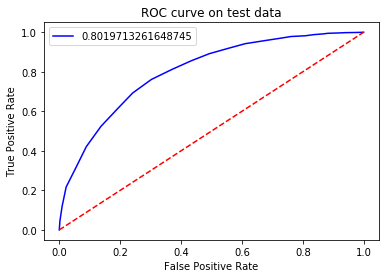

In [151]:
prob_test_k_b = kn_test_k_b.predict_proba(x_test_k_b_d)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_test_k_b)
roc_auc_curve_test_k_b = metrics.auc(fpr, tpr)


plt.title('ROC curve on test data')
plt.plot(fpr, tpr, 'b', label = roc_auc_curve_test_k_b)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Observation:
    
Threshold value: 0.5
    
AUC we got is 0.8 which means the probability of separation of positive and negative review will be ~80% good.

Curve represents the ROC while the area under the curve represents the AUC (Area Under Curve)

# TF-IDF

In [141]:
# Create an instance
tf_k = TfidfVectorizer(ngram_range = (1,2), min_df = 10, max_features = 500)

# Fit and transform the x_train
x_train_k_tf = tf_k.fit_transform(x_train)

# Transform the x_test
x_test_k_tf = tf_k.transform(x_test)

# Normalization

In [142]:
# Normalize train and test data
x_train_k_tn = normalize(x_train_k_tf)
x_test_k_tn = normalize(x_test_k_tf)

print("Shape of normalized TFIDF train data:" + ' ' + str(x_train_k_tn.shape), '\n')
print("Shape of normalized TFIDF test data:" + ' ' + str(x_test_k_tn.shape))

Shape of normalized TFIDF train data: (24000, 500) 

Shape of normalized TFIDF test data: (6000, 500)


# Convert to dense matrix

In [143]:
# Converting to dense matrix
x_train_k_t_d = x_train_k_tn.todense()
x_test_k_t_d = x_test_k_tn.todense()

print("Type of x_train_k_t_d:" + ' ' +  str(type(x_train_k_t_d)))
print("Type of x_test_k_t_d:"  + ' ' + str(type(x_test_k_t_d)))

Type of x_train_k_t_d: <class 'numpy.matrixlib.defmatrix.matrix'>
Type of x_test_k_t_d: <class 'numpy.matrixlib.defmatrix.matrix'>


# Split into train and cv

train and cv data is used to find the best hyperparameter 'k' and build the model

In [144]:
x_tr_k_t, x_cv_k_t, y_tr_k_t, y_cv_k_t = train_test_split(x_train_k_t_d, y_train, random_state = 0,
                                                          test_size = 0.2, shuffle = False)

# Find optimal hyperparameter 'k'

Train: train and cv

Test: train and cv

In [145]:
# Creating a 'for loop' to find the optimal k value

auc_k_t_cv = []
auc_k_t_tr = []

ki = range(1,50,3)

for i in ki:
    knn = KNeighborsClassifier(n_neighbors = i, algorithm = 'kd_tree')
    knn_k_t = knn.fit(x_tr_k_t, y_tr_k_t)
    
    # cv
    pred_k_t_cv = knn_k_t.predict_proba(x_cv_k_t)[:,1]
    auc_scr_k_t_cv = roc_auc_score(y_cv_k_t, pred_k_t_cv)
    auc_k_t_cv.append(auc_scr_k_t_cv)
    
    # train
    pred_k_t_tr = knn_k_t.predict_proba(x_tr_k_t)[:,1]
    auc_scr_k_t_tr = roc_auc_score(y_tr_k_t, pred_k_t_tr)
    auc_k_t_tr.append(auc_scr_k_t_tr)
    
# Optimal k
score_k_t_cv = [x for x in auc_k_t_cv]
opt_k_t_cv = ki[score_k_t_cv.index(max(score_k_t_cv))]
print("Maximum AUC score of cv is:" + ' ' + str(max(score_k_t_cv)))
print("Corresponding k value of cv is:",opt_k_t_cv, '\n')

print('*'*50)

score_k_t_tr = [x for x in auc_k_t_tr]
opt_k_t_tr = ki[score_k_t_tr.index(max(score_k_t_tr))]
print("Maximum AUC score of train is:" + ' ' + str(max(score_k_t_tr)) )
print("Corresponding k value of train is:", opt_k_t_tr, '\n')

Maximum AUC score of cv is: 0.7697167212367998
Corresponding k value of cv is: 49 

**************************************************
Maximum AUC score of train is: 1.0
Corresponding k value of train is: 1 



# Observation:

For cv, Maximum AUC score we got is ~76% and k value is 49. For train, Maximum AUC score we got is 100% and k value is 1

Taking 1 which resulted in 100% score may lead to overfit. We can probably consider 49 as k.

Let's check graphically and then confirm the k value

# Plot k v/s AUC score of train and cv

Text(0.5, 1.0, 'K values v/s AUC')

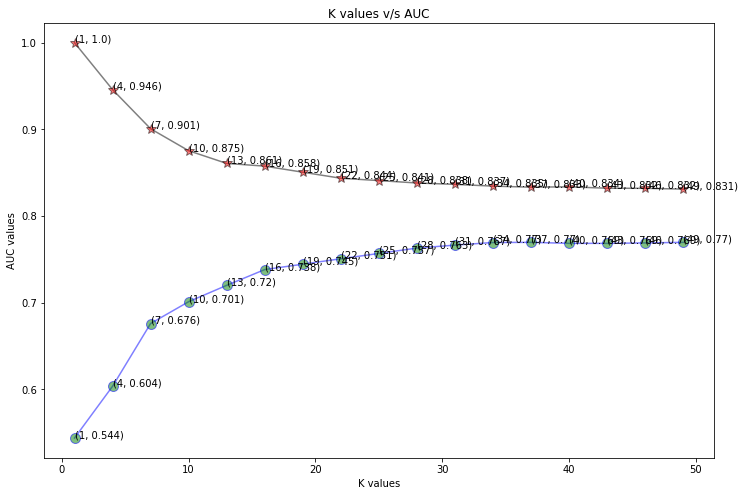

In [154]:
plt.figure(figsize = (12,8))
plt.plot(ki, score_k_t_cv, marker = 'o', color = 'blue', markerfacecolor = 'g', markersize = '10', alpha = 0.5)

for xy in zip(ki, np.round(auc_k_t_cv,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.plot(ki, score_k_t_tr, marker = '*', color = 'black', markerfacecolor = 'r', markersize = '10', alpha = 0.5)

for xy in zip(ki, np.round(auc_k_t_tr,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
plt.xlabel("K values")
plt.ylabel("AUC values")
plt.title("K values v/s AUC")

# Observation:
    
Graphically, we can see that train curve decreasing gradually while cv cure is increasing gradually. The gap between traiv cure and cv curve, as we can see, is less at the k value of 49 with ~79% score.

We will consider k value as 49 and will predict the test data.

# Model performance on train and cv with ROC curve

Text(0.5, 0, 'False Positive Rate')

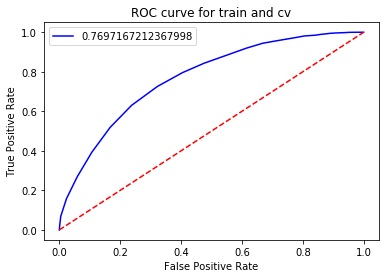

In [152]:
knn_p_k_t= KNeighborsClassifier(n_neighbors = opt_k_t_cv, algorithm = 'kd_tree')
knn_p_k_t = knn_p_k_t.fit(x_tr_k_t, y_tr_k_t)

prob_p_k_t = knn_p_k_t.predict_proba(x_cv_k_t)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_cv_k_t, prob_p_k_t)
roc_auc_curve_p_k_t = metrics.auc(fpr, tpr)


plt.title('ROC curve for train and cv')
plt.plot(fpr, tpr, 'b', label = roc_auc_curve_p_k_t)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Observation:
    
We got 0.76 which 76% AUC score. Probability of model in separating positive and negative reply is 76%

# Applying KNN on test data with alpha 49.

In [156]:
kn_test_k_t = KNeighborsClassifier(n_neighbors = opt_k_t_cv, algorithm = 'kd_tree')
kn_test_k_t = kn_test_k_t.fit(x_train_k_t_d, y_train)
pred_test_k_t = kn_test_k_t.predict(x_test_k_t_d)

# predict_proba_ for roc_auc_score
pred_pro_test_k_t = kn_test_k_t.predict_proba(x_test_k_t_d)[:,1]

ROC AUC score is  0.775 

**************************************************
f1 score is  0.915 

**************************************************
Precision score is  0.843 

**************************************************
ROC AUC Score is  0.998 

**************************************************
Classification report 

              precision    recall  f1-score   support

           0       0.90      0.05      0.09       978
           1       0.84      1.00      0.91      5022

   micro avg       0.84      0.84      0.84      6000
   macro avg       0.87      0.52      0.50      6000
weighted avg       0.85      0.84      0.78      6000

**************************************************
Confusion matrix table: 



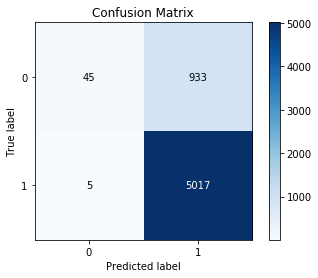

In [157]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, classification_report

rat_k = np.round(roc_auc_score(y_test, pred_pro_test_k_t),3)
print("ROC AUC score is ", rat_k, '\n')
print('*'*50)

ft_k = np.round(f1_score(y_test, pred_test_k_t),3)
print("f1 score is ", ft_k, '\n')
print('*'*50)

pt_k = np.round(precision_score(y_test, pred_test_k_t),3)
print("Precision score is ", pt_k, '\n')
print('*'*50)

ret_k = np.round(recall_score(y_test, pred_test_k_b),3)
print("ROC AUC Score is ", ret_k, '\n')
print('*'*50)

print("Classification report", '\n')
print(classification_report(y_test, pred_test_k_t))
print('*'*50)

# Referred from: https://scikit-plot.readthedocs.io/en/stable/Quickstart.html
print("Confusion matrix table:", '\n')
skplt.metrics.plot_confusion_matrix(y_test, pred_test_k_t)

# ROC curve on train and test data

Text(0.5, 0, 'False Positive Rate')

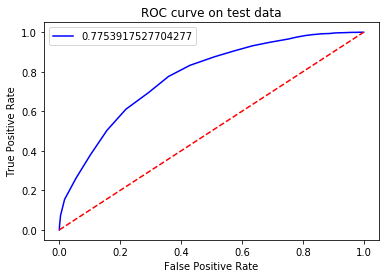

In [158]:
prob_test_k_t = kn_test_k_t.predict_proba(x_test_k_t_d)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_test_k_t)
roc_auc_curve_test_k_t = metrics.auc(fpr, tpr)


plt.title('ROC curve on test data')
plt.plot(fpr, tpr, 'b', label = roc_auc_curve_test_k_t)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Observation:
    
Threshold value: 0.5
    
AUC we got is 0.77 which means the probability of separation of positive and negative review will be ~77% good.

Curve represents the ROC while the area under the curve represents the AUC (Area Under Curve)

# Average Word2Vec

# Summary using pretty table

In [167]:
from prettytable import PrettyTable

a = PrettyTable()


a.field_names = ["S.No", "Featurization", "K value", "ROC AUC", "Precision", "Recall", "f1-score"]

a.add_row([ (1), "Bag of Words", opt_b_cv, rab, pb, reb, fb])
a.add_row([ (2), "Tf-Idf", opt_t_cv, rat, pt, ret, ft])

print(a.get_string(title = "Summary Table for Brute Force algorithm"))

print()

from prettytable import PrettyTable

b = PrettyTable()

b.field_names = ["S.No", "Featurization", "K value", "ROC AUC", "Precision", "Recall", "f1-score"]

b.add_row([ (1), "Bag of Words", opt_k_b_cv, rab_k, pb_k, reb_k, fb_k])
b.add_row([ (2), "Tf-Idf", opt_k_t_cv, rat_k, pt_k, ret_k, ft_k])

print(b.get_string(title = "Summary Table for KD Tree algorithm"))

+--------------------------------------------------------------------------+
|                 Summary Table for Brute Force algorithm                  |
+------+---------------+---------+---------+-----------+--------+----------+
| S.No | Featurization | K value | ROC AUC | Precision | Recall | f1-score |
+------+---------------+---------+---------+-----------+--------+----------+
|  1   |  Bag of Words |    49   |   0.81  |   0.843   | 0.999  |  0.914   |
|  2   |     Tf-Idf    |    49   |  0.824  |   0.844   | 0.999  |  0.915   |
+------+---------------+---------+---------+-----------+--------+----------+

+--------------------------------------------------------------------------+
|                   Summary Table for KD Tree algorithm                    |
+------+---------------+---------+---------+-----------+--------+----------+
| S.No | Featurization | K value | ROC AUC | Precision | Recall | f1-score |
+------+---------------+---------+---------+-----------+--------+----------

# Conclusion:

1) AUC score for both brute force algorithm and kd tree algorithm doesn't seem great.

2) Precision doesn't look that great with ~83% on an average.

3) But Recall and F1-score looks good with ~99% and ~91% respectively.

Overall, if we look at the AUC score, we can conclude that KNN model is not good for predicting review text.
